<a href="https://colab.research.google.com/github/Madhuanabala/breast-cancer/blob/model-building/ExtraTreesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.6 MB/s eta 0:00:00


In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, mean_absolute_error, cohen_kappa_score, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd

In [3]:
np.random.seed(42)
random.seed(42)

In [5]:
df = pd.read_csv('/content/combined_dataset_fs_2.csv')
df

,Unnamed: 0,KRFP17,KRFP1146,KRFP1157,KRFP2667,KRFP2986,KRFP3058,KRFP3180,KRFP3360,KRFP3395,...,BCUT2D_CHGHI_1.0,BCUT2D_CHGLO_1.0,BCUT2D_MRHI_2.0,Chi4n_0,PEOE_VSA6_0,SlogP_VSA11_0,RingCount_0,fr_NH0_0,fr_aniline_0,fr_aryl_methyl_0
0,0,1,0,1,1,1,1,0,1,1,...,1,0,0,0,0,0,0,1,1,1
1,1,1,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,0,1,1,1
2,2,1,0,1,1,1,1,0,1,1,...,1,0,0,0,0,0,0,1,1,1
3,3,0,0,0,0,1,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
4,4,0,0,0,0,1,0,0,0,0,...,1,1,0,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,1812,0,0,0,0,1,1,0,0,0,...,1,0,0,1,1,1,0,1,1,1
1813,1813,0,0,0,0,1,1,0,0,0,...,1,0,0,1,1,1,0,1,1,1
1814,1814,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,0,1,1
1815,1815,0,1,0,0,0,0,1,0,0,...,1,0,0,1,1,1,1,1,0,1


In [6]:
df = df.drop('Unnamed: 0', axis=1)
X = df.drop(["bioactivity_class"], axis=1)
Y = df["bioactivity_class"]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)


In [8]:
# Initialize and Train ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, Y_train)


ExtraTreesClassifier(random_state=42)

In [9]:
y_pred = et.predict(X_test)
y_pred_proba = et.predict_proba(X_test)[:, 1]

In [10]:
# Evaluation Metrics
accuracy = accuracy_score(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred_proba)
clf_report = classification_report(Y_test, y_pred)

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
mae = mean_absolute_error(Y_test, y_pred)
kappa = cohen_kappa_score(Y_test, y_pred)

In [12]:
# Print Results
print("ExtraTreesClassifier Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"Classification Report:\n{clf_report}")
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nSensitivity (Recall): {sensitivity:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Cohen's Kappa Score: {kappa:.4f}")

ExtraTreesClassifier Evaluation Metrics:
Accuracy: 0.8938
AUC: 0.9520
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       249
           1       0.91      0.90      0.90       297

    accuracy                           0.89       546
   macro avg       0.89      0.89      0.89       546
weighted avg       0.89      0.89      0.89       546


Confusion Matrix:
[[222  27]
 [ 31 266]]

Sensitivity (Recall): 0.8956
Mean Absolute Error (MAE): 0.1062
Cohen's Kappa Score: 0.7862


In [13]:
# ROC Curve Plot
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

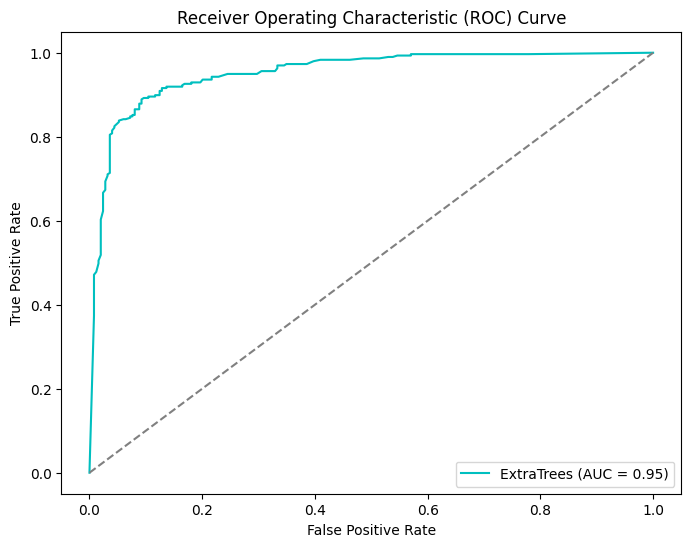

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='c', label=f'ExtraTrees (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

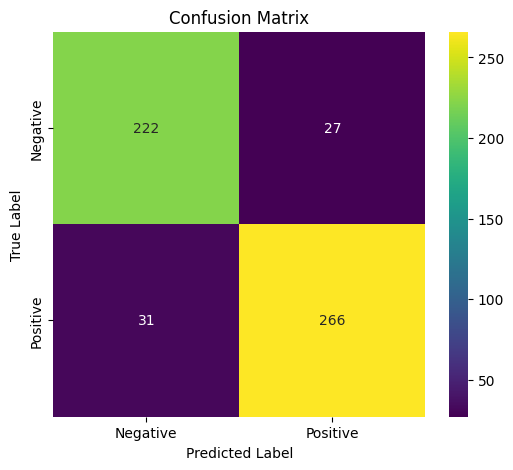

In [16]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# Bar Plot for Sensitivity, MAE, and Kappa Score
metrics = ["Sensitivity (Recall)", "Mean Absolute Error", "Cohen's Kappa Score"]
values = [sensitivity, mae, kappa]

<ipython-input-18-f60e0778ea28>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="plasma")


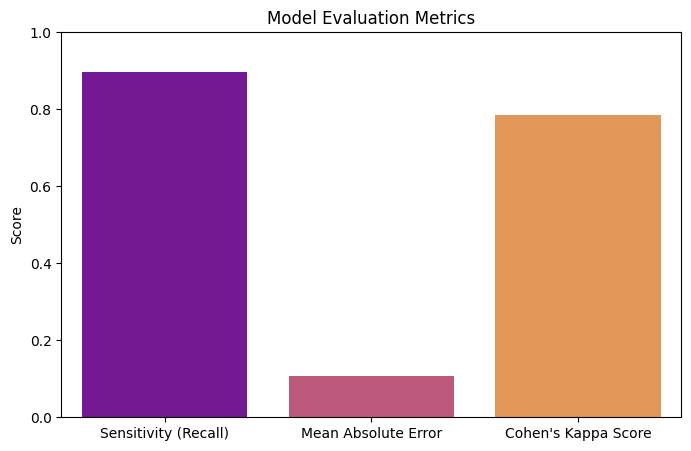

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="plasma")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)  # Metrics are between 0 and 1
plt.show()